In [1]:
import numpy as np
import pandas as pd
# https://www.kaggle.com/datasets/shelvigarg/wine-quality-dataset
df = pd.read_csv('https://raw.githubusercontent.com/fenago/datasets/main/winequalityN.csv')
df.sample(5)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2752,white,7.1,0.43,0.30,6.6,0.025,15.0,138.0,0.99126,3.18,0.46,12.6,6
4982,red,6.3,0.30,0.48,1.8,0.069,18.0,61.0,0.99590,3.44,0.78,10.3,6
913,white,5.8,0.29,0.05,0.8,0.038,11.0,30.0,0.99240,3.36,0.35,9.2,5
1979,white,7.5,0.38,0.50,12.8,0.042,57.0,184.0,0.99840,3.09,0.46,9.0,6
2007,white,5.6,0.18,0.31,1.5,0.038,16.0,84.0,0.99240,3.34,0.58,10.1,6


In [2]:
# Check for missing values and then dropNA:
df = df.dropna()

In [3]:
df['is_white_wine'] = [
    1 if typ == 'white' else 0 for typ in df['type']]
df.drop('type', axis=1, inplace=True)

In [4]:
df['is_good_wine'] = [
    1 if quality >= 6 else 0 for quality in df['quality']
]
df.drop('quality', axis=1, inplace=True)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_white_wine,is_good_wine
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


In [5]:
from sklearn.model_selection import train_test_split
X = df.drop('is_good_wine', axis=1)
y = df['is_good_wine']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=42
)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
import tensorflow as tf
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)
history = model.fit(X_train_scaled, y_train, epochs=40)

Metal device set to: Apple M1 Pro
Epoch 1/40


2022-05-23 08:09:17.557900: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-23 08:09:17.558191: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/zheng/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
2022-05-23 08:09:17.708104: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-23 08:09:18.232551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled

162/162 [==============================] - 3s 10ms/step - loss: 0.6007 - accuracy: 0.7157 - precision: 0.7551 - recall: 0.8168
Epoch 2/40
162/162 [==============================] - 1s 9ms/step - loss: 0.5372 - accuracy: 0.7308 - precision: 0.7515 - recall: 0.8601
Epoch 3/40
162/162 [==============================] - 1s 9ms/step - loss: 0.5265 - accuracy: 0.7369 - precision: 0.7703 - recall: 0.8341
Epoch 4/40
162/162 [==============================] - 1s 9ms/step - loss: 0.5199 - accuracy: 0.7491 - precision: 0.7786 - recall: 0.8448
Epoch 5/40
162/162 [==============================] - 1s 8ms/step - loss: 0.5246 - accuracy: 0.7493 - precision: 0.7739 - recall: 0.8546
Epoch 6/40
162/162 [==============================] - 1s 8ms/step - loss: 0.5076 - accuracy: 0.7505 - precision: 0.7786 - recall: 0.8479
Epoch 7/40
162/162 [==============================] - 1s 9ms/step - loss: 0.5042 - accuracy: 0.7538 - precision: 0.7891 - recall: 0.8351
Epoch 8/40
162/162 [==============================]

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

ValueError: x and y must have same first dimension, but have shapes (100,) and (40,)

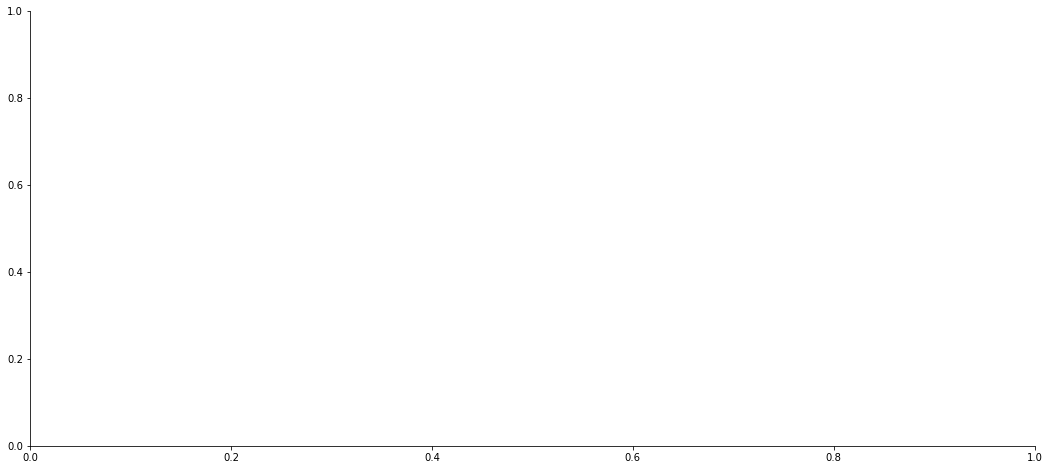

In [9]:
plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();
    

In [11]:
predictions = model.predict(X_test_scaled)


2022-05-16 23:59:00.144960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [12]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [13]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, prediction_classes))

[[130 352]
 [ 36 775]]


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.70
Precision: 0.69
Recall: 0.96
